In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('home_depot_data/train.csv', encoding="ISO-8859-1")
df_test = pd.read_csv('home_depot_data/test.csv', encoding="ISO-8859-1")
df_attr = pd.read_csv('home_depot_data/attributes.csv')
df_pro_desc = pd.read_csv('home_depot_data/product_descriptions.csv')


In [4]:
df_train

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67
...,...,...,...,...,...
74062,221457,206638,Atlantic Windowpane 576 CD or 192 DVD Blu-Ray ...,tv riser glass,1.00
74063,221458,206639,Philips 40-Watt Halogen R20 Flood Light Bulb (...,r20 halogen light,3.00
74064,221463,206641,Schlage Camelot In-Active Aged Bronze Handlese...,schlage lock siena half dummy knob with,2.33
74065,221471,206648,Plastec 11 in. x 24 in. Rose Garden Wall Decor...,zen garden decor,3.00


What is the total number of product-query pairs in the training data? 

In [8]:
df_train.shape[0]

74067

What is the number of unique products in the training data?

In [16]:
unique_products = df_train['product_uid'].unique()
len(unique_products)

54667

What are the two most occurring products in the training data and how often do they occur? 

In [35]:
product_occurence = df_train[['id', 'product_uid']].groupby(['product_uid']).count()
product_occurence.sort_values('id', ascending=False)


,id
product_uid,
101959,21
102893,21
101892,18
101539,17
104691,17
...,...
206638,1
206639,1
206641,1


In [40]:
mean_training_data = df_train.describe()


mean_training_data, mean_training_data['relevance'].median()

(                  id    product_uid     relevance
 count   74067.000000   74067.000000  74067.000000
 mean   112385.709223  142331.911553      2.381634
 std     64016.573650   30770.774864      0.533984
 min         2.000000  100001.000000      1.000000
 25%     57163.500000  115128.500000      2.000000
 50%    113228.000000  137334.000000      2.330000
 75%    168275.500000  166883.500000      3.000000
 max    221473.000000  206650.000000      3.000000,
 np.float64(2.355816895513522))

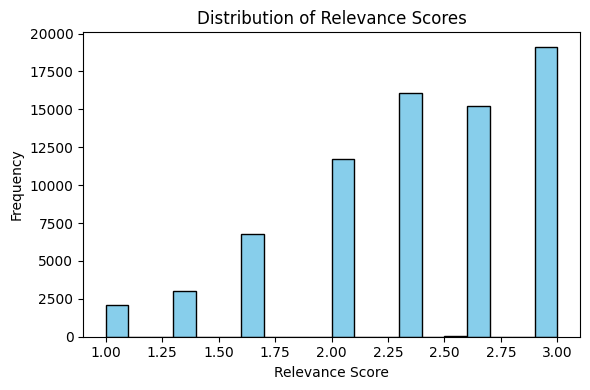

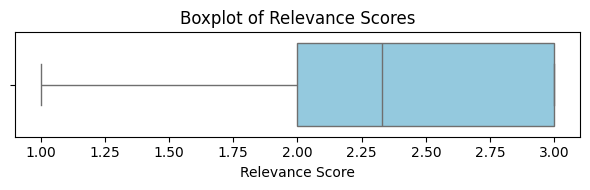

In [44]:
plt.figure(figsize=(6,4))
plt.hist(df_train['relevance'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Relevance Scores')
plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplot of relevance scores
plt.figure(figsize=(6,2))
sns.boxplot(x=df_train['relevance'], color='skyblue')
plt.title('Boxplot of Relevance Scores')
plt.xlabel('Relevance Score')
plt.tight_layout()
plt.show()

In [45]:
brand_values = df_attr[df_attr['name'] == 'MFG Brand Name']['value']
# Count the frequency of each brand and get the top 5
top5_brands = brand_values.value_counts().head(5)
print(top5_brands)


value
Unbranded                     2954
Hampton Bay                   1723
KOHLER                        1389
Everbilt                      1381
Home Decorators Collection    1275
Name: count, dtype: int64
